# Review of the process

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

### Get Iris data

In [2]:
iris_data = pd.read_csv("../Data/iris.csv", names = ["sepal_l", "sepal_w", "petal_l", "petal_w", "class"])

### Summarize the data

In [3]:
iris_data.describe()

sepal_l     sepal_w     petal_l     petal_w
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

### Explore the data

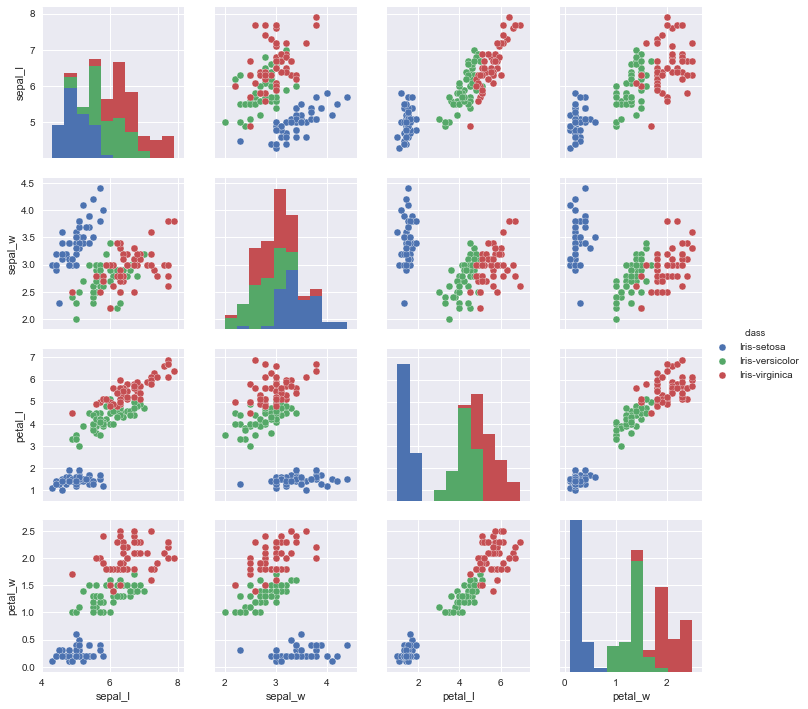

In [4]:
pair_plot = sns.pairplot(iris_data, hue='class')

### Clean, impute, transform data

In [ ]:
from sklearn.preprocessing import Imputer

fill_nan = Imputer(missing_values=np.nan, strategy="mean", axis=0)

### Feature selection, feature engineering

In [ ]:
# drop returns a copy
# df = iris_data.drop(['some_feature'], axis=1) 

# feature engineering
# df["new_feature"] = df["feature_1"] * df["feature_2"]

# lambda function
# f = lambda x: x**2            
# df["new_feature"].map(f)  # for element-wise application

### Train/Test split

In [5]:
# Get X and y
X = iris_data[["sepal_l", "sepal_w", "petal_l", "petal_w"]].values

# Transform 'Iris-virginica' to be the positive class (binary classification)
y = iris_data['class'].map({"Iris-setosa":0, 'Iris-versicolor':1, 'Iris-virginica': 0}).values

In [6]:
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)


### Scale/Standardize

In [7]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 2.26050169, -1.04854298,  1.77691682,  1.4226136 ],
       [-0.11897377,  1.8551145 , -1.14624252, -1.13955497],
       [-0.95179019,  1.37117159, -1.31488633, -1.2676634 ],
       [-1.18973773, -0.08065715, -1.31488633, -1.13955497],
       [-0.71384264, -0.80657152,  0.09047874,  0.26963774]])

### Models

In [9]:
# Logistic Regression
# --- Key Parameters ---
# C: the regularization strength (smaller values for greater regularization); default is 1.0
# penalty: used to specify the penalization used for regularizartion; default is l2
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1)

# Support Vector Machine
# --- Key Parameters ---
# C: how much penalty there is for misclassification (smaller values for greater penalty); default is 1.0
# kernel: specifies the kernel type to be used (often 'rbf' or 'linear'); default is 'rbf'
# gamma: the coefficient for non-linear kernels
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)

# Random Forest (ensemble of Decision Trees)
# --- Key Parameters ---
# n_estimators: the number of trees in the forest; default is 10
# max_depth: the depth of the tree; defualt is None, full expansion
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
# --- Key Parameters ---
# n_neighbors: number of neighbors to use; default is 5
# weights: weight function used; default is 'uniform'
        # 'uniform' means all points are weighted equally; '
        # 'distance' means closer points have greater influence;
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Neural Network
# --- Key Parameters ---
# hidden_layer_sizes: a tuple representing the number of nodes for respective layer; default is (100,)
# activation: the activation function for the hidden layer; defualt is 'relu'
        # usually 'relu', 'tanh', or 'sigmoid'
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

# Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               # accuracy measure
    print("Standard deviation:", scores.std())  # std measures how precise the measure is

In [11]:
display_scores(scores)

Scores: [0.58333333 0.5        0.90909091 0.8        0.7        0.7
 1.         0.6        0.8        0.7       ]
Mean: 0.7292424242424242
Standard deviation: 0.14449184254477299


In [14]:
classifiers = [log_reg, knn, svm, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/ana

In [15]:
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest", "NN"])
models_df

1    2         3    4    5    6    7    8    9    10
LR      0.583333  0.5  0.909091  0.8  0.7  0.7  1.0  0.6  0.8  0.7
KNN     0.916667  1.0  0.818182  1.0  1.0  0.9  1.0  0.9  1.0  0.9
SVM     0.583333  0.5  0.818182  0.8  0.7  0.6  1.0  0.6  0.8  0.6
Forest  1.000000  1.0  0.818182  1.0  1.0  0.9  1.0  0.9  1.0  0.7
NN      0.916667  1.0  0.909091  1.0  0.9  0.8  1.0  0.8  1.0  0.8

In [17]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

1    2         3    4    5    6    7    8    9   10      Mean
LR      0.583333  0.5  0.909091  0.8  0.7  0.7  1.0  0.6  0.8  0.7  0.729242
KNN     0.916667  1.0  0.818182  1.0  1.0  0.9  1.0  0.9  1.0  0.9  0.943485
SVM     0.583333  0.5  0.818182  0.8  0.7  0.6  1.0  0.6  0.8  0.6  0.700152
Forest  1.000000  1.0  0.818182  1.0  1.0  0.9  1.0  0.9  1.0  0.7  0.931818
NN      0.916667  1.0  0.909091  1.0  0.9  0.8  1.0  0.8  1.0  0.8  0.912576

# Boxplot and Model Selection

Text(0.5,1,'Classification Accuracy using All Features')

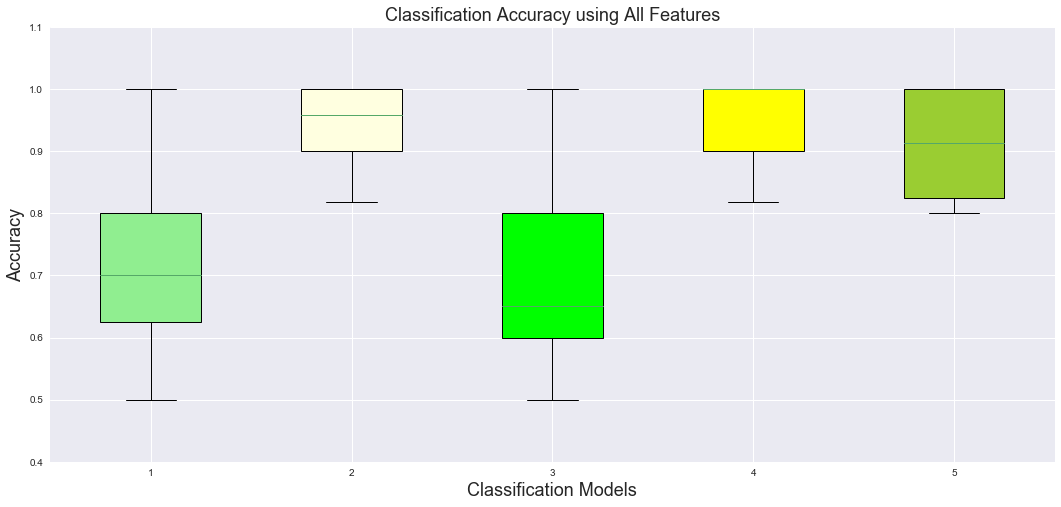

In [18]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# Hyperparameter Tuning (on selected models)


In [19]:
# hyperparameter tuning can be done manually or using Grid Search with Cross-validation

from sklearn.grid_search import GridSearchCV

# Grid Search
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)

gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], n_neighbors: [3, 5, 7]}], scoring='accuracy', cv=3)

# Cross Validation, evaluates the returned model
cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


array([0.58333333, 0.5       , 1.        , 0.8       , 0.7       ,
       0.7       , 1.        , 0.6       , 0.8       , 0.6       ])

### Retrain tuned model using ALL Training data

In [22]:
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.3904761904761905 
Test score: 0.5555555555555556


# Confusion Matrix

             precision    recall  f1-score   support

      other       0.96      0.96      0.96        27
 versicolor       0.94      0.94      0.94        18

avg / total       0.96      0.96      0.96        45



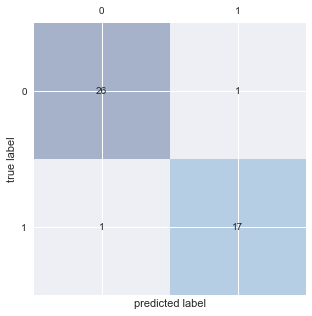

In [21]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["other", "versicolor"]))

### Train final model on FULL dataset (ALL Training and Test data)

In [ ]:
from sklearn.externals import joblib

# scale/standardize X (the original full dataset)
X_std = stdsc.fit_transform(X)

forest.fit(X_std, y)

# save the model to disk
joblib.dump(forest, 'final_forest_model.sav')
 
# load the model from disk
forest_final = joblib.load('final_forest_model.sav')

# use the model as before
accuracy = forest_final.score(X_test, y_test)

# Lab Homework #2

Using the Pima Indian dataset, build the best machine learning model that you can to predict whether or not the women in the dataset have diabetes.

• Clean and transform the data as you desire

• Summarize and/or visualize the data 

• Standardize the data

• Choose 2-5 algorithms and perform 10-fold cross validation

• Display a boxplot and select the best performing model

• Tune its hyperparameters (manually or using grid search)

• Train the same algorithm on your full training set (no cross validation)   ( model.fit(X_std_train, y_train))

• Test the model on your test set ( model.score(X_test, y_test) )

• Display the Precision, Recall, and F1 score metrics along with a confusion matrix 

• Be able to explain what the scores and confusion matrix mean pertaining to your data 

** Things to possibly try to improve your model's performance:
				try different algorithms, tune the hyperparameters, Grid Search, 
				try a different scaler (standardization vs. normalization), imputation, feature engineering
